In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('coursera data.csv')
df.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [3]:
df.shape

(891, 7)

In [4]:
std_enroll = []
for i in range(0, len(df)):
    try:
        num = df['course_students_enrolled'].str.split('k')[i][0]
        num = float(num) * 1000 
        std_enroll.append(num)
    except:
        num = df['course_students_enrolled'].str.split('m')[i][0]
        num = float(num) * 1000000
        std_enroll.append(num)
df['course_students_enrolled'] = std_enroll
df['course_students_enrolled'] = df['course_students_enrolled'].astype(float)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Unnamed: 0                  891 non-null int64
course_title                891 non-null object
course_organization         891 non-null object
course_Certificate_type     891 non-null object
course_rating               891 non-null float64
course_difficulty           891 non-null object
course_students_enrolled    891 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 34.9+ KB


In [6]:
df.nunique()

Unnamed: 0                  891
course_title                888
course_organization         154
course_Certificate_type       3
course_rating                14
course_difficulty             4
course_students_enrolled    205
dtype: int64

Q:-1.What are the different coursera organisation, course titles, course certificate types etc?

In [7]:
df.groupby(['course_Certificate_type']).course_organization.value_counts()

course_Certificate_type  course_organization                     
COURSE                   University of Pennsylvania                  44
                         University of Michigan                      30
                         Duke University                             22
                         Google Cloud                                17
                         Johns Hopkins University                    17
                                                                     ..
SPECIALIZATION           University of London                         1
                         Vanderbilt University                        1
                         West Virginia University                     1
                         Yale University                              1
                         École Polytechnique Fédérale de Lausanne     1
Name: course_organization, Length: 236, dtype: int64

In [8]:
df.groupby(['course_Certificate_type','course_organization']).course_title.sum()

course_Certificate_type  course_organization                     
COURSE                   (ISC)²                                      Access ControlsIdentifying, Monitoring, and An...
                         Amazon Web Services                         AWS Fundamentals: Addressing Security RiskAWS ...
                         American Museum of Natural History          Ecology: Ecosystem Dynamics and ConservationTh...
                         Arizona State University                    Teach English Now! Foundational PrinciplesTeac...
                         Atlassian                                   Agile with Atlassian JiraVersion Control with Git
                                                                                           ...                        
SPECIALIZATION           West Virginia University                                          Sales Operations/Management
                         Yale University                             Climate Change and Health: From 

Q:-2.Is there any relation bt the no.of student enroll and rating?

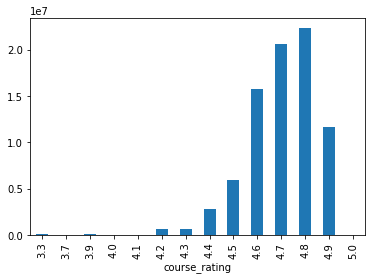

In [9]:
df.groupby('course_rating').course_students_enrolled.sum().plot(kind='bar')

In [10]:
df.groupby('course_rating').course_students_enrolled.sum()

course_rating
3.3      140000.0
3.7       29000.0
3.9       91000.0
4.0       46000.0
4.1       34000.0
4.2      637200.0
4.3      624000.0
4.4     2782600.0
4.5     5962000.0
4.6    15783200.0
4.7    20574900.0
4.8    22335600.0
4.9    11639300.0
5.0        3100.0
Name: course_students_enrolled, dtype: float64

Q:-3.which course title has maximum no. of students?

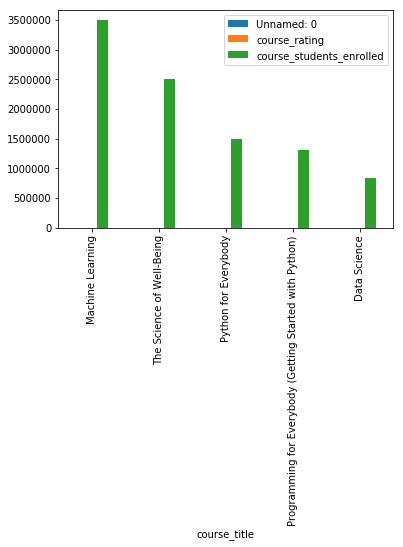

In [11]:
df.groupby(['course_title']).sum().nlargest(5,'course_students_enrolled').plot(kind='bar')

Q:-3.which organisation has minimum no. of students?

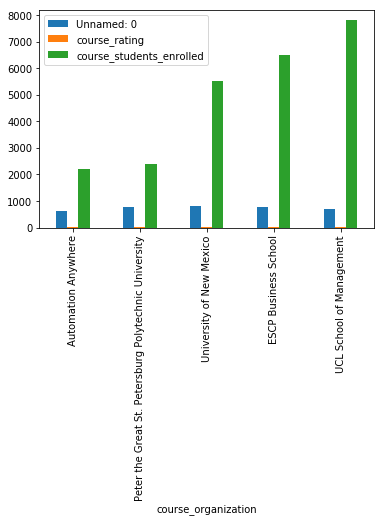

In [12]:
df.groupby(['course_organization']).sum().nsmallest(5,'course_students_enrolled').plot(kind='bar')

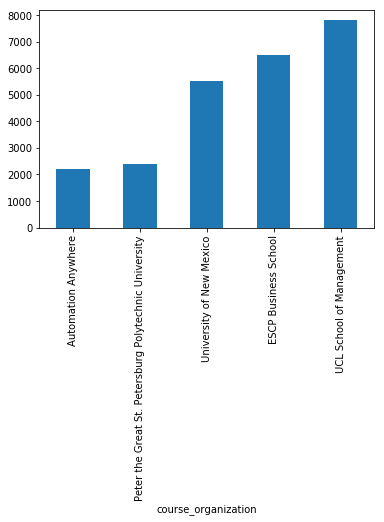

In [13]:
df.groupby(['course_organization']).sum()['course_students_enrolled'].nsmallest(5).plot(kind='bar')

Q:-5 Is there any relation bt the course difficulty and no.of students enrolled? if yes name its kind.

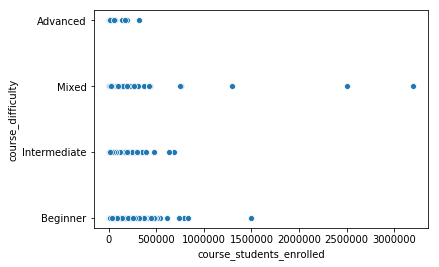

In [14]:
sns.scatterplot(y='course_difficulty',x='course_students_enrolled',data=df)

In [15]:
df.groupby('course_difficulty').course_students_enrolled.sum()

course_difficulty
Advanced         1264400.0
Beginner        39921800.0
Intermediate    14506300.0
Mixed           24989400.0
Name: course_students_enrolled, dtype: float64

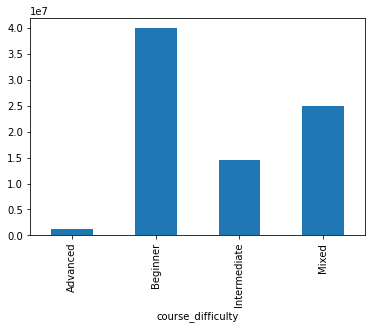

In [16]:
df.groupby('course_difficulty').course_students_enrolled.sum().plot(kind='bar')

Q:-6. Which course and organization is the best amongst all for a beginer?

In [17]:
df_new = df[(df["course_difficulty"]=="Beginner") & (df["course_Certificate_type"]=="COURSE")]

In [18]:
df_new.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
5,661,ADHD: Everyday Strategies for Elementary Students,University at Buffalo,COURSE,4.7,Beginner,39000.0
6,54,AI For Everyone,deeplearning.ai,COURSE,4.8,Beginner,350000.0
13,631,AWS Fundamentals: Addressing Security Risk,Amazon Web Services,COURSE,4.3,Beginner,11000.0
14,861,AWS Fundamentals: Building Serverless Applicat...,Amazon Web Services,COURSE,4.7,Beginner,27000.0
15,281,AWS Fundamentals: Going Cloud-Native,Amazon Web Services,COURSE,4.7,Beginner,110000.0


In [19]:
df_new2=df_new[(df['course_rating']> 4.8) & (df['course_students_enrolled']>150000)]
df_new2.course_students_enrolled.sort_values(ascending = False)

C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


322    400000.0
512    270000.0
427    270000.0
124    220000.0
293    200000.0
61     180000.0
Name: course_students_enrolled, dtype: float64

In [20]:
df_new2.sort_values('course_students_enrolled')

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
61,551,Aprendiendo a aprender: Poderosas herramientas...,University of California San Diego,COURSE,4.9,Beginner,180000.0
293,92,Excel Skills for Business: Essentials,Macquarie University,COURSE,4.9,Beginner,200000.0
124,21,COVID-19 Contact Tracing,Johns Hopkins University,COURSE,4.9,Beginner,220000.0
427,123,Improving Deep Neural Networks: Hyperparameter...,deeplearning.ai,COURSE,4.9,Beginner,270000.0
512,29,Introduction to Psychology,Yale University,COURSE,4.9,Beginner,270000.0
322,113,First Step Korean,Yonsei University,COURSE,4.9,Beginner,400000.0


In [21]:
import pandas_profiling

C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Ashish\Anaconda3\envs\python\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Ashish\Anaconda3\envs\python\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\ipykernel\k

In [22]:
from pandas_profiling import ProfileReport

In [23]:
profile = ProfileReport(df)

C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [33]:
profile

Number of variables,7
Number of observations,891
Total Missing (%),0.0%
Total size in memory,34.9 KiB
Average record size in memory,40.1 B
Numeric,3
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,0
